<a href="https://colab.research.google.com/gist/qbeer/a7b26bcbc56a63f32097e52738f57a76/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#Exploratory-data-analysis" class="anchor-link">¶</a>
========================================================================================================================================================

<http://patbaa.web.elte.hu/physdm/data/titanic.csv>

On the link above you will find a dataset about the Titanic passengers.
Your task is to explore the dataset.

Help for the columns:

-   SibSp - number of sibling/spouses on the ship
-   Parch - number of parent/children on the ship
-   Cabin - the cabin they slept in (if they had a cabin)
-   Embarked - harbour of entering the ship
-   Pclass - passenger class (like on trains)

### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not.<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#1.-Load-the-above-linked-csv-file-as-a-pandas-dataframe.-Check-&amp;-plot-if-any-of-the-columns-has-missing-values.-If-they-have,-investigate-if-the-missingness-is-random-or-not." class="anchor-link">¶</a>

Impute the missing values in a sensible way:

-   if only a very small percentage is missing, imputing with the
    column-wise mean makes sense, or also removing the missing rows
    makes sense
-   if in a row almost all the entries is missing, it worth to remove
    that given row
-   if a larger portion is missing from a column, usually it worth to
    encode that with a value that does not appear in the dataset (eg:
    -1).

The imputing method affects different machine learning models different
way, but now we are interested only in EDA, so try to keep as much
information as possible!

In [1]:
#importing meaningful stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
import os
import seaborn as sns

In [2]:
#loading th file, as it is next to my juypter notebook
titanic_data = pd.read_csv("titanic.csv") #it already assumes some stuff -> clead .csv means simple loading
titanic_data.info()
titanic_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As it seems there are missing data in some rows. These should be handled is some way: some values has to be inserted or the rows that contain any missing values should be removed.

1. The cabin column is mostly missing.

2. The age row has some missing values.

3. Thats strange to have an embarked row: this means that the 2 person who didn't embark doesn't count as a Titanic passanger.

Personally, I don't like removing data, I would like to just ignore it. Replacing unknown paramteres with the mean of the row is making the variance lower compared to ingoring it.

In [3]:
len(titanic_data.loc[0])

12

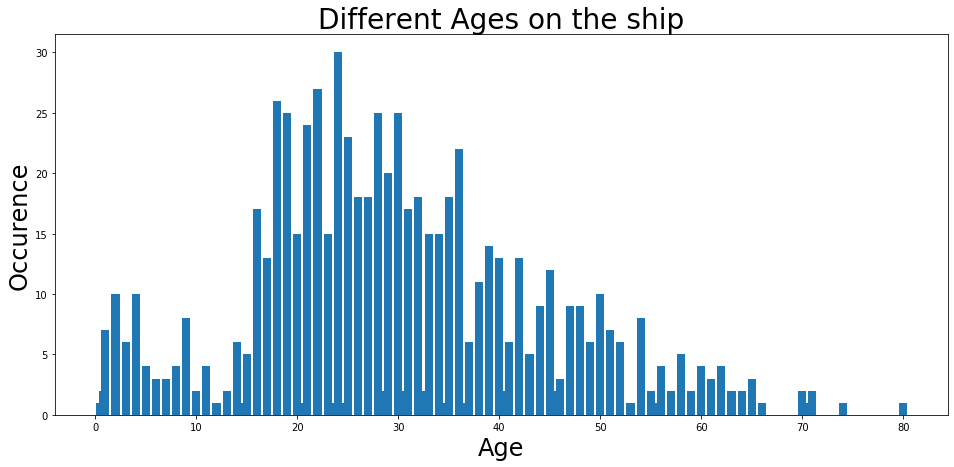

In [4]:
ages, counts = np.unique(titanic_data.Age, return_counts=True)

plt.figure(figsize=(16,7))
plt.bar(ages,counts)
plt.title("Different Ages on the ship", fontsize=28)
plt.xlabel("Age", fontsize=24)
plt.ylabel("Occurence", fontsize=24)
plt.show()

Now we know that the distribution of different ages are not uniform, or not any visibly apparent know distribution.

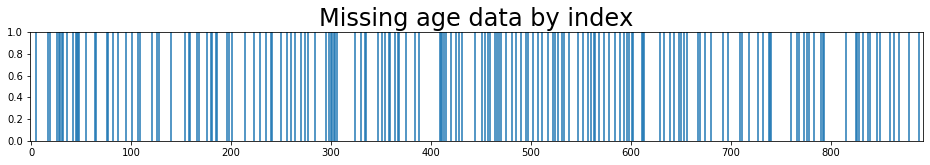

In [5]:
age_nan_loc = np.argwhere(np.isnan(titanic_data["Age"].values))
age_nan_loc = age_nan_loc.flatten()

plt.figure(figsize=(16,2))
plt.title("Missing age data by index", fontsize=24)
for i in age_nan_loc:
    plt.axvline(x=i,ymin=0,ymax=1)
plt.xlim(-1,len(titanic_data)+1)
plt.show()

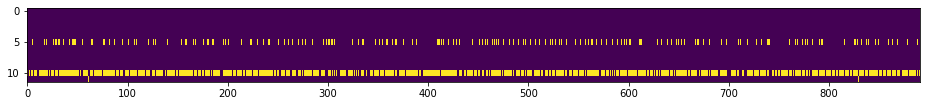

In [6]:
#let's see what is the shown method capable of
plt.figure(figsize=(16, np.e/2))
im = plt.imshow(titanic_data.isna().T,   interpolation='nearest', aspect='auto')
plt.show()

### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#2.-Create-a-heatmap-which-shows-how-many-people-survived-and-dies-with-the-different-Pclass-variables.-You-need-to-create-a-table-where-the-columns-indicates-if-a-person-survived-or-not,-the-rows-indicates-the-different-Pclass-and-the-cell-values-contains-the-number-of-people-belonging-the-that-given-category.-The-table-should-be-colored-based-on-the-value-of-the-cells-in-the-table." class="anchor-link">¶</a>

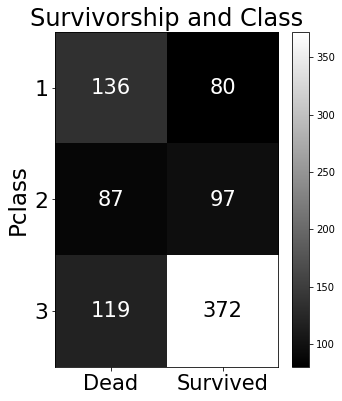

In [7]:
mask = 0 < titanic_data["Survived"]         #did it survive? mask : no, this person it didn't  | ~mask : yes, the person did
#print(len(titanic_data["Survived"][mask]))
#print(len(titanic_data["Survived"][~mask]))
#print(len(titanic_data["Survived"][~mask]) + len(titanic_data["Survived"][mask]))

#now i have to count -> this may be not the most efficient way, but it does the job
#plus i have done it in a step-by-step way
dead_class, dead_count = np.unique(titanic_data["Pclass"][mask], return_counts=True)
surv_class, surv_count = np.unique(titanic_data["Pclass"][~mask], return_counts=True)

mapped_survivorship  = np.array(list(zip(dead_count, surv_count)))

#let's see what we got
#print(dead_class, dead_count)
#print(surv_class, surv_count)

#a nice heatmap plot
fig, ax = plt.subplots(1,1,figsize=(5,8))

psm = plt.imshow(mapped_survivorship, cmap="gray")
ax.set_title("Survivorship and Class", fontsize=24)
ax.set_xticks(np.arange(0,len(mapped_survivorship[0,:])))            #class ticks place
ax.set_yticks(np.arange(0,len(mapped_survivorship[:,0])))               #survived ticks place
ax_x = ["Dead", "Survived"]      #class tick labels
ax_y = [str(n) for n in range(1,len(mapped_survivorship)+1)]         #survived tick labels
ax.set_xticklabels(ax_x, fontsize=21)
ax.set_yticklabels(ax_y, fontsize=22)
ax.set_ylabel("Pclass", fontsize=23)


for i in range(0,len(dead_class)):
    for j in range(0,2):
        color0="black"
        if(int(round(mapped_survivorship[i,j])) < int(round(np.max(mapped_survivorship)))*0.7):
            color0 = "white"
        text = ax.text(j, i, str(mapped_survivorship[i, j]),
                       ha="center", va="center", color=color0, fontsize=21)     
        
fig.colorbar(psm, ax=ax, shrink = 0.77)
plt.show()

If someone takes a look at the row by row dead-survived counts, it becomes very visible that the higher the class, the higher the passenger's survival chance.

### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#3.-Create-boxplots-for-each-different-Pclass.-The-boxplot-should-show-the-age-distribution-for-the-given-Pclass.-Plot-all-of-these-next-to-each-other-in-a-row-to-make-it-easier-to-compare!" class="anchor-link">¶</a>

In [8]:
titanic_data["Age"][1 == titanic_data["Pclass"]]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

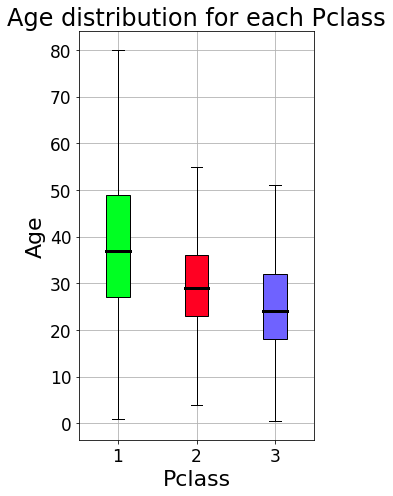

In [9]:
#masks for each pclass -> these have NaNs, NaNs are not liked!
m1 = titanic_data["Age"].values[1 == titanic_data["Pclass"]]
m2 = titanic_data["Age"].values[2 == titanic_data["Pclass"]]
m3 = titanic_data["Age"].values[3 == titanic_data["Pclass"]]
#merge data in list
data = [m1[~np.isnan(m1)],m2[~np.isnan(m2)],m3[~np.isnan(m3)]]


plt.figure(figsize=(5,7))
plt.title("Age distribution for each Pclass", fontsize=24)

bp = plt.boxplot(data,showfliers=False, patch_artist=True)
colors = ["#00FF22", "#FF0022", "#6F62FF"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)

plt.xlabel("Pclass", fontsize=22)
plt.ylabel("Age", fontsize=22)
plt.tick_params(axis='both', labelsize=17)
plt.tight_layout()

plt.grid()
plt.show()

As it is visible, the higher the Pclass, the lower the mean of Age of the Pclass is. We may draw a conclusion as that the younger people are coming from much richer families, nobles, and the lower class people were only able to buy cheap tickets.

### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#4.-Calculate-the-correlation-matrix-for-the-numerical-columns.-Show-it-also-as-a-heatmap-described-at-the-1st-task." class="anchor-link">¶</a>

Which feature seems to play the most important role in surviving/not
surviving? Explain how and why could that feature be important!

For the correlation matrix to be created, we can only use numerical data. So cabin number, ticket number cannot be used. We, however, could transform the gender of a passenger to binary, 0 for female and 1 for male passengers to see if that does effect the chances of survivorship. (From movies, one could assume it does) This leaves us with 6 columns: **Survived, Pclass, Sex, Age, SibSP, Parch and Fare**. (passangerID is numerical too, but carries no more information)

**Handling of NaNs in the data**

Personally, I don't like to replace NaNs with anything, so I will ignore them first. Age has some rows missing, which could
be used, so we could do 3 things: ignore NaNs, replace NaNs with mean, replace NaNs with a more sophisticated method.

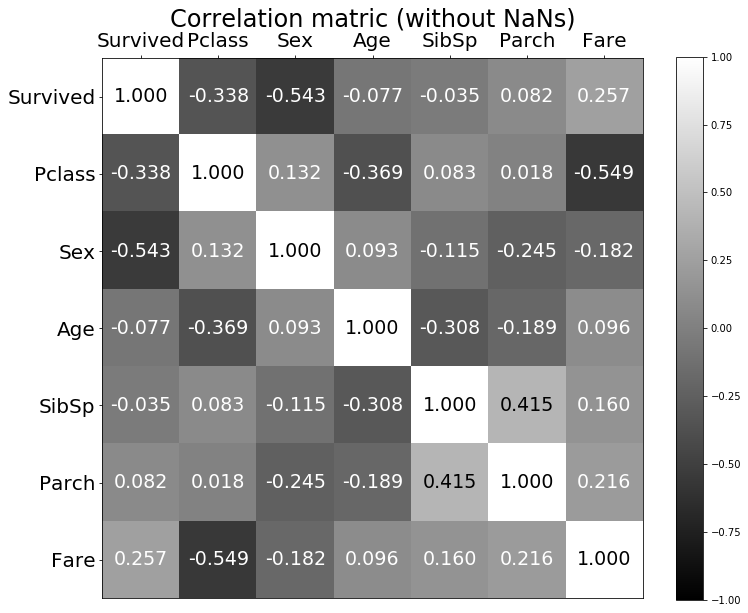

In [10]:
#make a copy for the manipulation
titanic_copy  = titanic_data.copy()
num_cols = ['Survived', 'Pclass','Sex','Age','SibSp', 'Parch', 'Fare'] #cols that have or will have numeric data
titanic_copy = titanic_copy[num_cols]


#assuming binary gender rules... also, mapping? shorter, would cause same kind of error.
"""
#this is not liked -> not used, remains here for me as a warning
for i in range(0,len(titanic_copy)):
    if titanic_copy['Sex'][i] == "male" :
        titanic_copy['Sex'][i] = 1
    else:
        titanic_copy['Sex'][i] = 0
"""
titanic_copy['Sex'] = titanic_copy['Sex'].map({"female" : 0, "male" : 1})
        
titanic_copy = titanic_copy.sort_values(by=['Pclass'])                  #sorting for Pclass -> turns out, no sorting is needed
#print(titanic_copy[~np.isnan(titanic_copy['Age'])][num_cols].head())    #with this, around 200 rows are removed

#onto the correlation matric... pandas has a builtin for that
titanic_corr = titanic_copy.corr(method="pearson")
#print(titanic_corr)
titanic_corr = np.array(titanic_corr)

fig, ax = plt.subplots(1,1,figsize=(11,11))
ax.set_title("Correlation matric (without NaNs)", fontsize=24)
psm = plt.imshow(titanic_corr, cmap="gray", vmin=-1, vmax=1)

for i in range(0,len(titanic_corr)):
    for j in range(0,len(titanic_corr)):
        color0="black"
        if(titanic_corr[i,j] < 0.3):
            color0 = "white"
        text = ax.text(j, i, "{0:.3f}".format(titanic_corr[i, j]),
                       ha="center", va="center", color=color0, fontsize=19) 
ax.xaxis.tick_top()
ax.set_xticks(np.arange(0,len(titanic_corr)))
ax.set_yticks(np.arange(0,len(titanic_corr)))
ax.set_xticklabels(num_cols, fontsize=20)
ax.set_yticklabels(num_cols, fontsize=20)

fig.colorbar(psm, ax=ax, shrink = 0.705)

plt.tight_layout()
plt.show()

Let's insert the means!

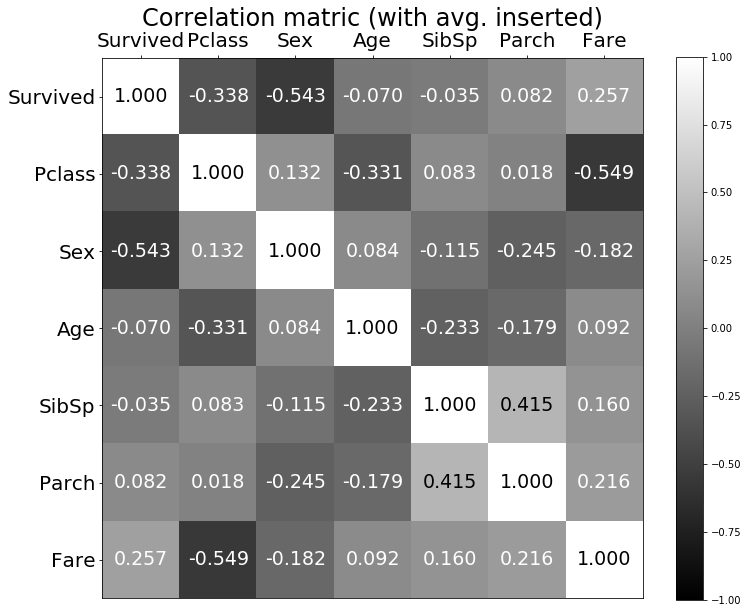

In [11]:
titanic_avg = np.average(titanic_data["Age"][~np.isnan(titanic_data["Age"])])
#copy again
titanic_copy = titanic_data.copy()
titanic_copy = titanic_copy[num_cols]
titanic_copy['Sex'] = titanic_copy['Sex'].map({"female" : 0, "male" : 1})  #map the genders again
titanic_copy['Age'].fillna(value=titanic_avg,inplace=True)
#np.isnan(titanic_copy['Age'])

#correlation
titanic_corr = titanic_copy.corr(method="pearson")
titanic_corr = np.array(titanic_corr)

fig, ax = plt.subplots(1,1,figsize=(11,11))
ax.set_title("Correlation matric (with avg. inserted)", fontsize=24)
psm = plt.imshow(titanic_corr, cmap="gray", vmin=-1, vmax=1)

for i in range(0,len(titanic_corr)):
    for j in range(0,len(titanic_corr)):
        color0="black"
        if(titanic_corr[i,j] < 0.3):
            color0 = "white"
        text = ax.text(j, i, "{0:.3f}".format(titanic_corr[i, j]),
                       ha="center", va="center", color=color0, fontsize=19) 
ax.xaxis.tick_top()
ax.set_xticks(np.arange(0,len(titanic_corr)))
ax.set_yticks(np.arange(0,len(titanic_corr)))
ax.set_xticklabels(num_cols, fontsize=20)
ax.set_yticklabels(num_cols, fontsize=20)

fig.colorbar(psm, ax=ax, shrink = 0.705)

plt.tight_layout()
plt.show()

It seems like that the rows and columns that have "Age" here returned a value closer to zero. This is caused by the mean insertion, which lead to a lower variance. (As the correlation formula has mean and scatter in it.) Other data is unchanged.

### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#5.-Create-two-plots-which-you-think-are-meaningful.-Interpret-both-of-them.-(Eg.:-older-people-buy-more-expensive-ticket?-people-buying-more-expensive-ticket-survive-more?-etc.)" class="anchor-link">¶</a>

Coincedentaly, I wanted to look into these correlations myself too, cause the data column "Fare" is not consisting out of a couple discrete values, it varies very much.



In [12]:
def line(x,a):
    return a*x

[[1.         0.09606669]
 [0.09606669 1.        ]]


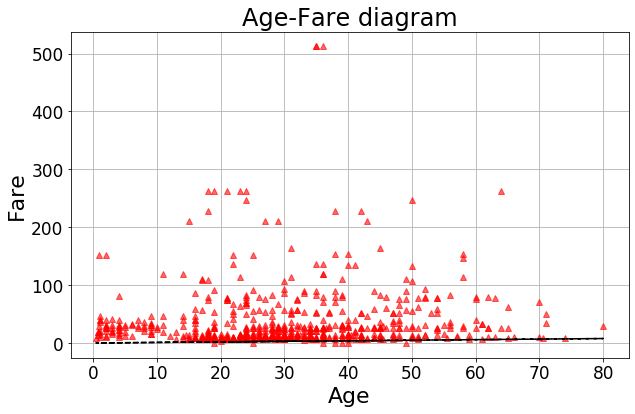

In [13]:
#let's order age, make an age-fare diagram
titanic_age_fare = np.array(list(zip(titanic_data['Age'].values[~np.isnan(titanic_data['Age'])],titanic_data['Fare'].values[~np.isnan(titanic_data['Age'])])))
r = np.corrcoef(titanic_age_fare[:,0],titanic_age_fare[:,1]); print(r)

#plot
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.set_title("Age-Fare diagram", fontsize=24)
ax.plot(titanic_age_fare[:,0],titanic_age_fare[:,1], " ^r", alpha=0.6)
ax.plot(titanic_age_fare[:,0], line(titanic_age_fare[:,0],r[0,1]), linestyle="--", color="black")

ax.set_xlabel("Age", fontsize=22)
ax.set_ylabel("Fare", fontsize=22)
ax.tick_params(labelsize=17)

plt.grid()
plt.show()

It seems like there is not even a weak correlation between age and fare price. If we binned these, there might be some visible correlaion due to the binning itself. Let's take a look at the fare price and Pclass!

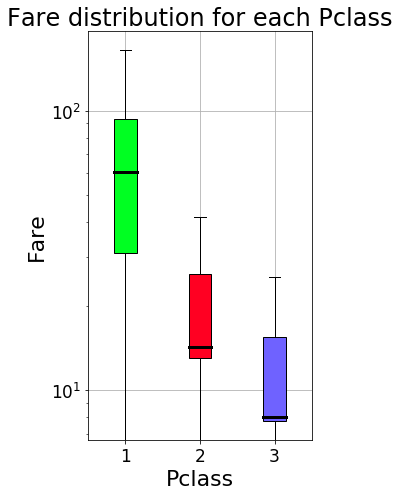

In [14]:
f1 = titanic_data["Fare"].values[titanic_data["Pclass"] == 1]
f2 = titanic_data["Fare"].values[titanic_data["Pclass"] == 2]
f3 = titanic_data["Fare"].values[titanic_data["Pclass"] == 3]

data1 = [f1,f2,f3]

plt.figure(figsize=(5,7))
plt.title("Fare distribution for each Pclass", fontsize=24)

bp = plt.boxplot(data1,showfliers=False, patch_artist=True)
colors = ["#00FF22", "#FF0022", "#6F62FF"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
    
plt.yscale("log")

plt.xlabel("Pclass", fontsize=22)
plt.ylabel("Fare", fontsize=22)
plt.tick_params(axis='both', labelsize=17)
plt.tight_layout()

plt.grid()
plt.show()

This is interesting: even though first class passengers paid a higher fare, it turned out to be that these passangers are less likely to survive. Now I will investigate, how many relatives are present for each class.

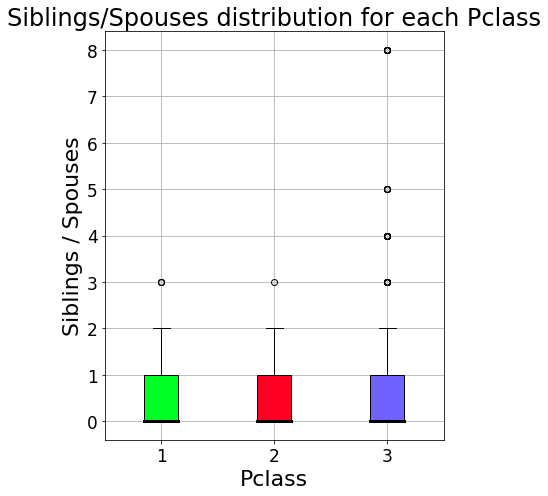

In [15]:
p1 = titanic_data["SibSp"].values[titanic_data["Pclass"] == 1]
p2 = titanic_data["SibSp"].values[titanic_data["Pclass"] == 2]
p3 = titanic_data["SibSp"].values[titanic_data["Pclass"] == 3]

data2 = [p1,p2,p3]

plt.figure(figsize=(7,7))
plt.title("Siblings/Spouses distribution for each Pclass", fontsize=24)

bp = plt.boxplot(data2,showfliers=True, patch_artist=True)
colors = ["#00FF22", "#FF0022", "#6F62FF"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)

plt.xlabel("Pclass", fontsize=22)
plt.ylabel("Siblings / Spouses", fontsize=22)
plt.tick_params(axis='both', labelsize=17)
plt.tight_layout()

plt.grid()
plt.show()

Now, it is not that apparent that 3rd class passangers actually have a higher sibling/spouse count.

### Hints:<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#Hints:" class="anchor-link">¶</a>

-   On total you can get 10 points for fully completing all tasks.
-   Decorate your notebook with, questions, explanation etc, make it
    self contained and understandable!
-   Comments you code when necessary
-   Write functions for repetitive tasks!
-   Use the pandas package for data loading and handling
-   Use matplotlib and seaborn for plotting or bokeh and plotly for
    interactive investigation
-   Use the scikit learn package for almost everything
-   Use for loops only if it is really necessary!
-   Code sharing is not allowed between student! Sharing code will
    result in zero points.
-   If you use code found on web, it is OK, but, make its source clear!